In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
dataSet = pd.read_csv("dataset.csv")

In [3]:
dataSet

,#,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
0,1,01-02-2023 00:00,01-02-2023 00:15,95.00,35.00,NaN,90.10,56.20,0.31,NaN,17.70,28.10,0.40
1,2,01-02-2023 00:15,01-02-2023 00:30,95.00,35.00,NaN,88.00,55.10,0.33,NaN,18.30,27.10,0.40
2,3,01-02-2023 00:30,01-02-2023 00:45,95.00,35.00,NaN,87.70,55.20,0.38,NaN,19.70,24.90,0.40
3,4,01-02-2023 00:45,01-02-2023 01:00,122.00,34.00,NaN,88.90,55.70,0.38,NaN,21.30,21.90,0.40
4,5,01-02-2023 01:00,01-02-2023 01:15,122.00,34.00,NaN,90.00,55.80,0.38,NaN,22.30,16.70,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,8639,01-05-2023 23:30,01-05-2023 23:45,19.00,11.00,20.80,100.20,70.20,0.58,9.50,10.80,30.00,0.10
8639,8640,01-05-2023 23:45,02-05-2023 00:00,32.00,6.00,21.80,98.80,70.30,NaN,NaN,11.00,33.50,0.10
8640,8641,Min,NaN,12.00,3.00,0.10,0.20,4.20,0.10,0.10,4.60,0.10,0.10
8641,8642,Max,NaN,847.00,474.00,157.50,106.90,165.20,4.00,645.60,62.40,123.80,0.60


In [4]:
dataSet.describe()

,#,"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
count,8643.000000,6962.000000,8417.000000,7274.000000,8227.000000,8228.000000,8147.000000,7192.000000,8317.000000,8190.000000,2448.000000
mean,4322.000000,181.479950,75.729083,14.667274,55.756492,42.682434,1.408695,34.312991,13.247534,35.632958,0.177647
std,2495.163522,136.235742,55.411450,19.291029,20.244845,22.475811,0.631759,40.099306,6.174230,27.034160,0.099215
min,1.000000,12.000000,3.000000,0.100000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2161.500000,84.000000,36.000000,3.900000,39.400000,25.000000,0.950000,16.100000,9.400000,10.500000,0.100000
50%,4322.000000,145.000000,61.000000,6.100000,53.200000,37.700000,1.420000,25.300000,11.000000,32.400000,0.100000
75%,6482.500000,238.000000,101.000000,16.500000,71.050000,53.800000,1.850000,35.200000,14.000000,58.800000,0.200000
max,8643.000000,847.000000,474.000000,157.500000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000


In [5]:
columns = dataSet.columns
date = columns[2]
columns = columns[3:]
columns

Index(['Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)',
       'Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)'],
      dtype='object')

In [6]:
for column in columns:
    print((dataSet[column].isna().sum() / len(dataSet[column])) * 100)

19.449265301399976
2.614832812680782
15.839407613097304
4.813143584403563
4.801573527710286
5.738748119865787
16.788152261946085
3.7718384820085618
5.2412356820548425
71.67650121485595


In [7]:
dataSet

,#,From,To (Interval: 15M),"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
0,1,01-02-2023 00:00,01-02-2023 00:15,95.00,35.00,NaN,90.10,56.20,0.31,NaN,17.70,28.10,0.40
1,2,01-02-2023 00:15,01-02-2023 00:30,95.00,35.00,NaN,88.00,55.10,0.33,NaN,18.30,27.10,0.40
2,3,01-02-2023 00:30,01-02-2023 00:45,95.00,35.00,NaN,87.70,55.20,0.38,NaN,19.70,24.90,0.40
3,4,01-02-2023 00:45,01-02-2023 01:00,122.00,34.00,NaN,88.90,55.70,0.38,NaN,21.30,21.90,0.40
4,5,01-02-2023 01:00,01-02-2023 01:15,122.00,34.00,NaN,90.00,55.80,0.38,NaN,22.30,16.70,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8638,8639,01-05-2023 23:30,01-05-2023 23:45,19.00,11.00,20.80,100.20,70.20,0.58,9.50,10.80,30.00,0.10
8639,8640,01-05-2023 23:45,02-05-2023 00:00,32.00,6.00,21.80,98.80,70.30,NaN,NaN,11.00,33.50,0.10
8640,8641,Min,NaN,12.00,3.00,0.10,0.20,4.20,0.10,0.10,4.60,0.10,0.10
8641,8642,Max,NaN,847.00,474.00,157.50,106.90,165.20,4.00,645.60,62.40,123.80,0.60


In [8]:
for column in columns:
    dataSet[column].fillna(dataSet[column].mean(), inplace = True)

In [9]:
dataSet.describe()

,#,"Singrauli, Surya Kiran Bhawan Dudhichua PM10 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua PM2.5 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NOX (ppb)","Singrauli, Surya Kiran Bhawan Dudhichua CO (mg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua SO2 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua NH3 (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Ozone (µg/m3)","Singrauli, Surya Kiran Bhawan Dudhichua Benzene (µg/m3)"
count,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000,8643.000000
mean,4322.000000,181.479950,75.729083,14.667274,55.756492,42.682434,1.408695,34.312991,13.247534,35.632958,0.177647
std,2495.163522,122.269954,54.682107,17.697220,19.751572,21.929513,0.613362,36.578372,6.056656,26.316079,0.052794
min,1.000000,12.000000,3.000000,0.100000,0.200000,4.200000,0.100000,0.100000,4.600000,0.100000,0.100000
25%,2161.500000,99.000000,37.000000,4.100000,40.200000,25.500000,0.970000,17.900000,9.500000,11.100000,0.177647
50%,4322.000000,181.479950,63.000000,8.600000,54.700000,39.500000,1.408695,28.500000,11.200000,35.632958,0.177647
75%,6482.500000,208.000000,100.000000,14.667274,69.900000,52.700000,1.820000,34.312991,13.800000,57.500000,0.177647
max,8643.000000,847.000000,474.000000,157.500000,106.900000,165.200000,4.000000,645.600000,62.400000,123.800000,0.600000


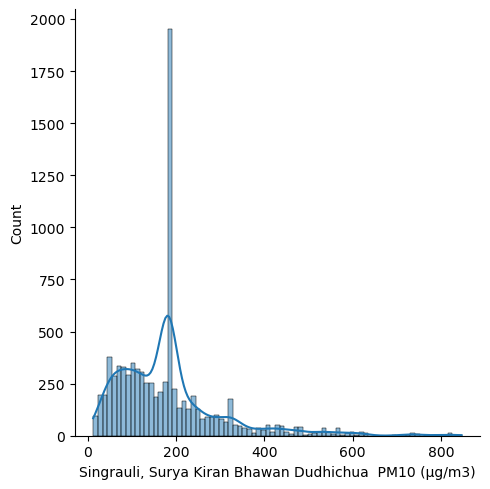

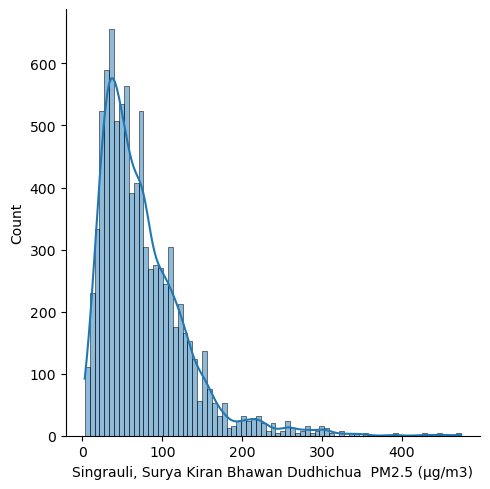

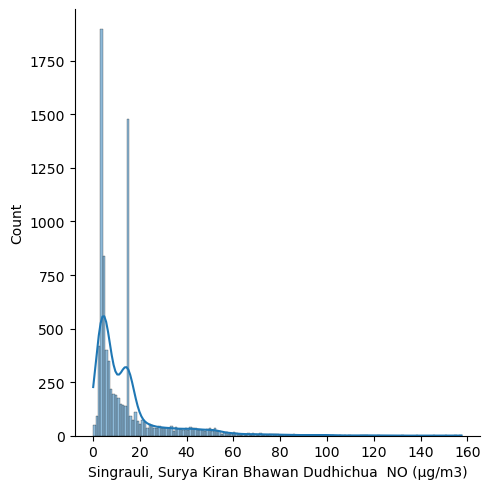

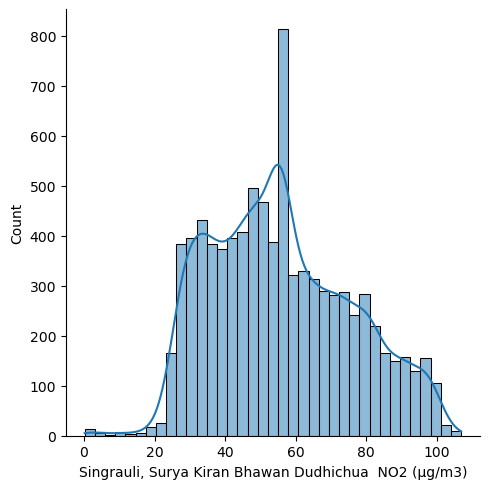

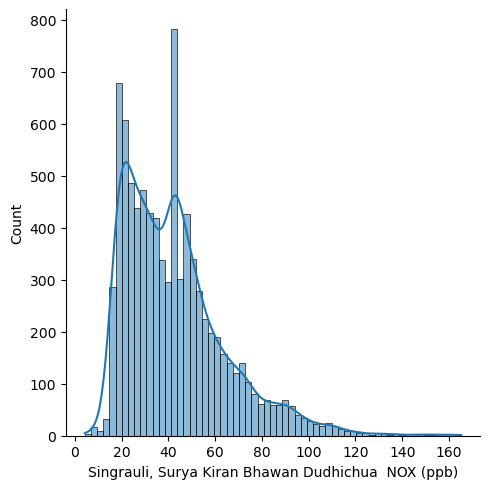

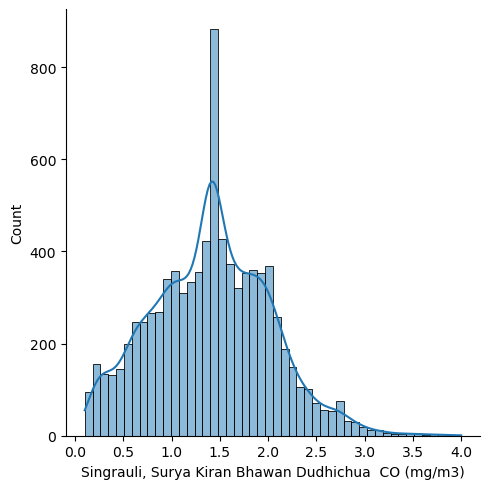

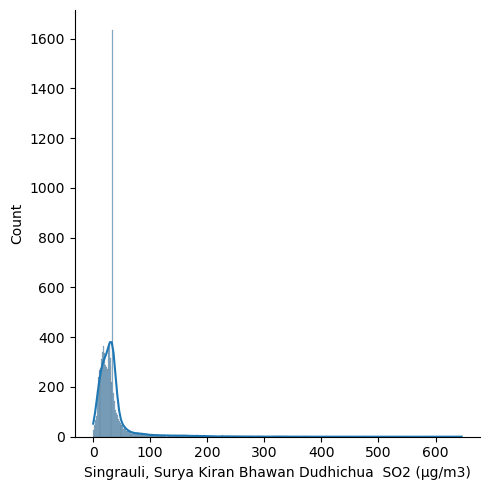

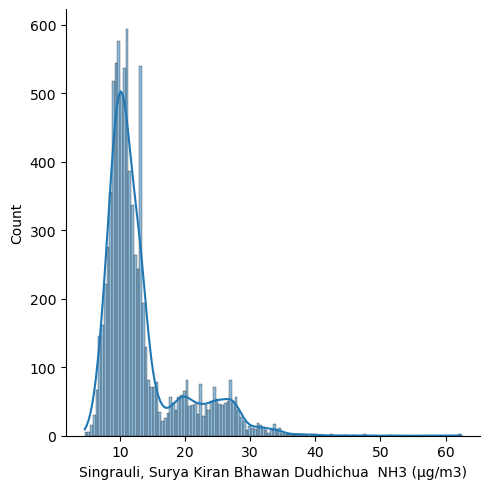

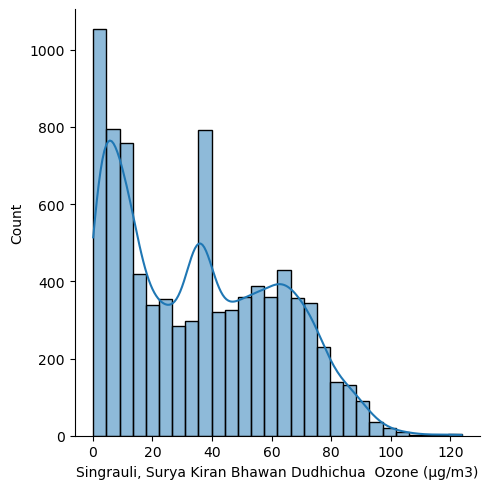

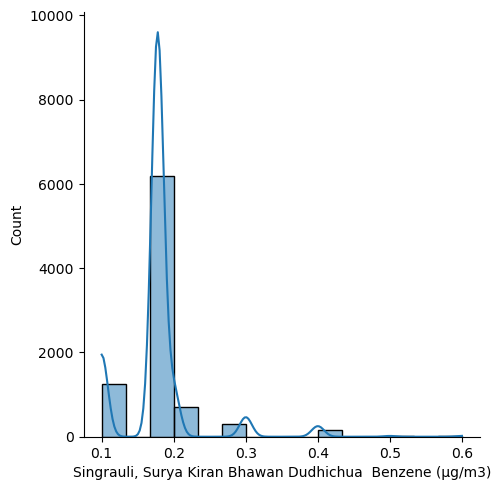

In [10]:
for column in columns:
    sns.displot(dataSet[column], kde = True)
    plt.show()

In [11]:
import statsmodels.api as sm

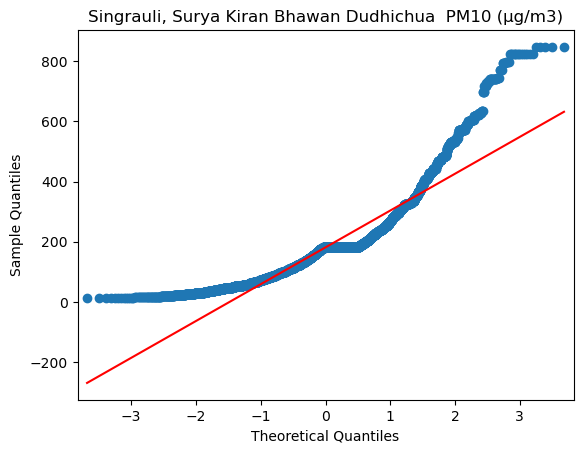

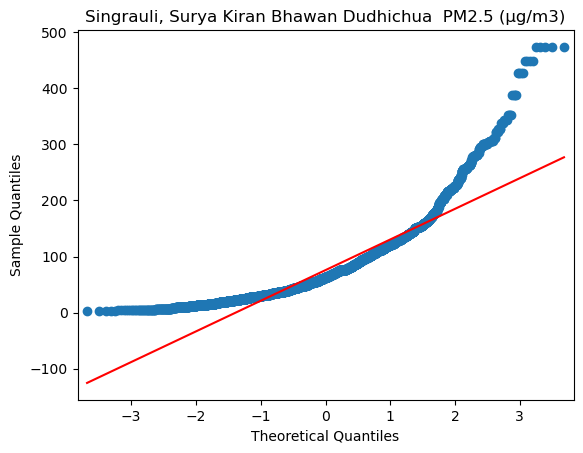

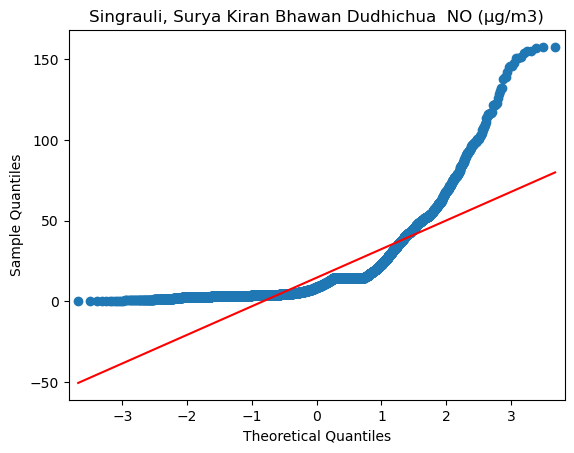

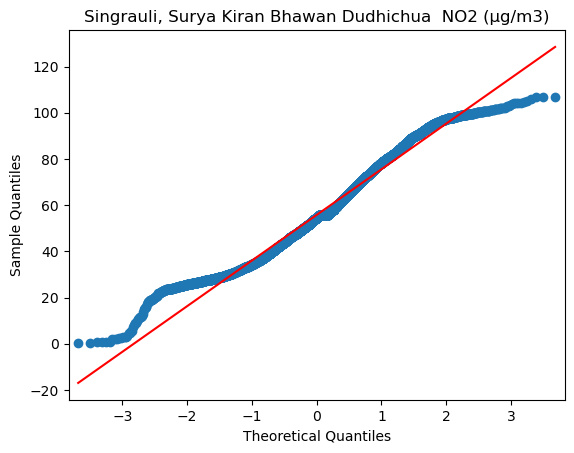

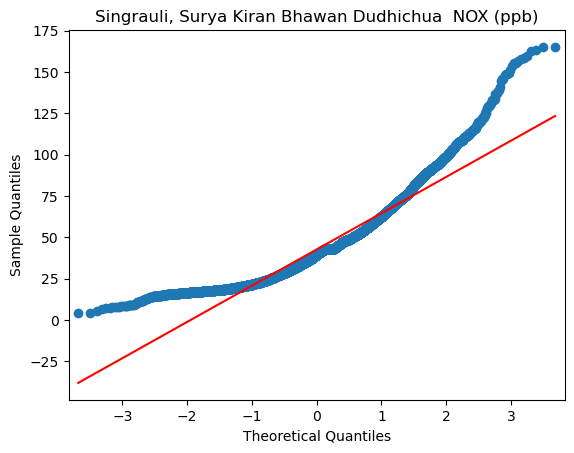

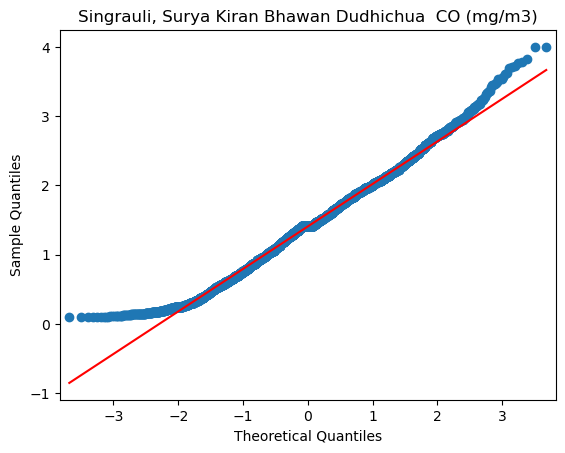

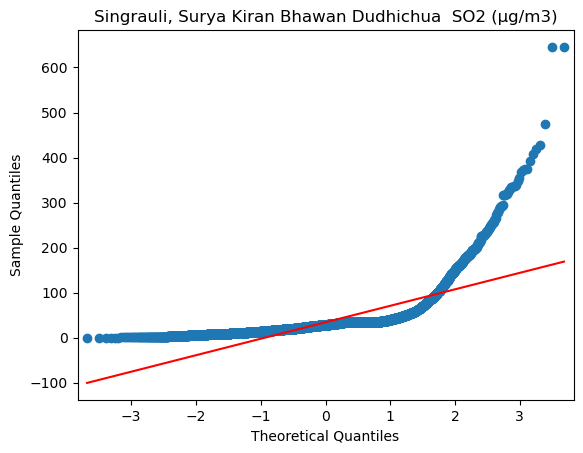

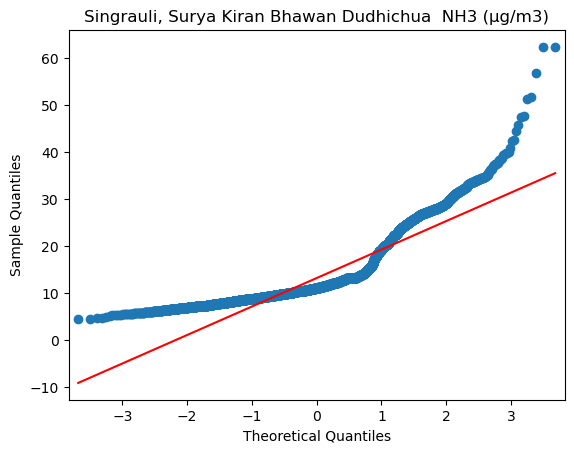

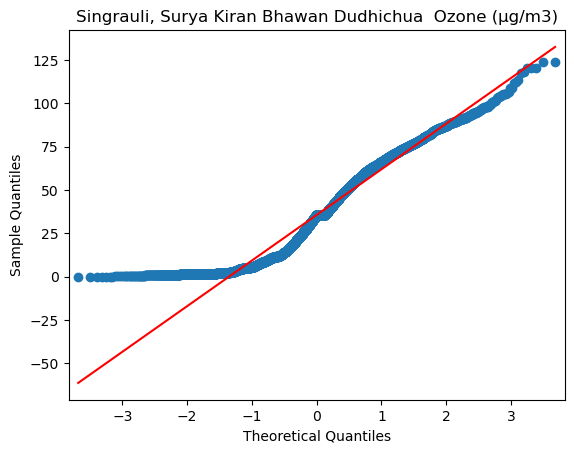

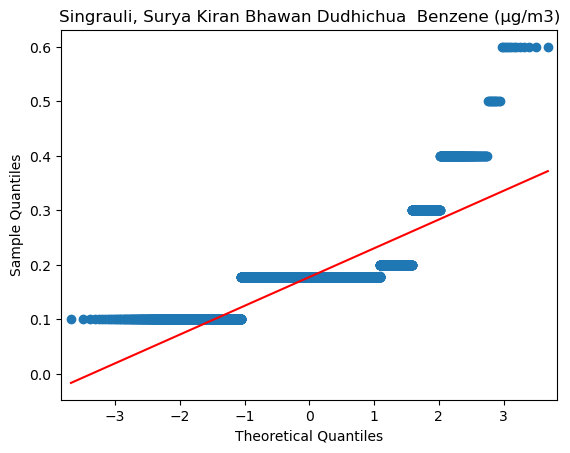

In [12]:
for column in columns:
    fig, ax = plt.subplots()
    sm.qqplot(dataSet[column], line='s', ax=ax)  
    ax.set_title(column)
    plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for column in columns:
    result = adfuller(dataSet[column])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No. of Lags : %f' % result[2])
    print('No of Observation used for ADF regression and Critical Value Prediction : %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


ADF Statistic: -9.271489
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8606.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -11.515044
p-value: 0.000000
No. of Lags : 36.000000
No of Observation used for ADF regression and Critical Value Prediction : 8606.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -16.288041
p-value: 0.000000
No. of Lags : 5.000000
No of Observation used for ADF regression and Critical Value Prediction : 8637.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -11.157093
p-value: 0.000000
No. of Lags : 12.000000
No of Observation used for ADF regression and Critical Value Prediction : 8630.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
ADF Statistic: -13.786838
p-value: 0.000000
No. of Lags : 6.000000
No of Observation used for ADF regression and Critical Value Prediction : 8636.000000
Critical Values:


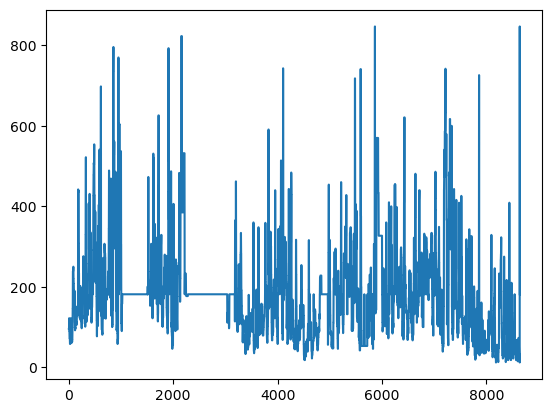

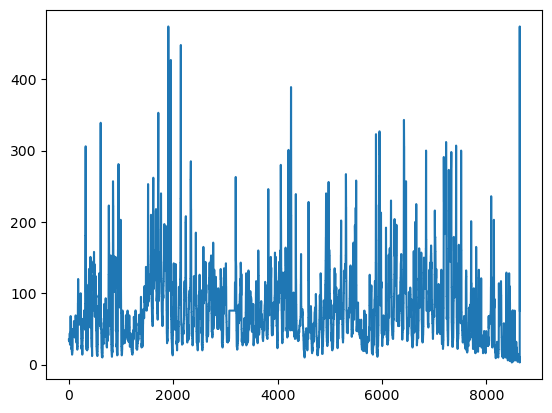

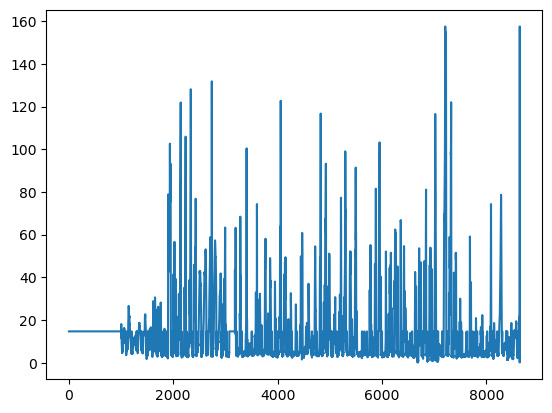

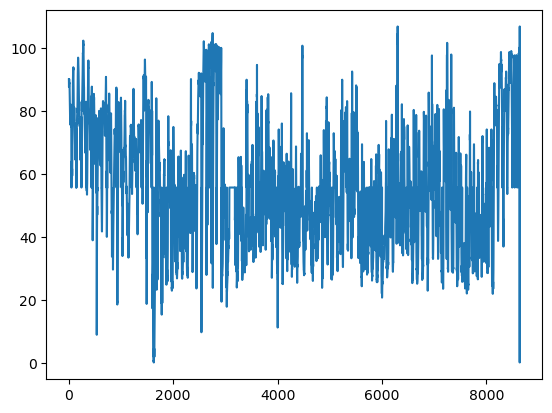

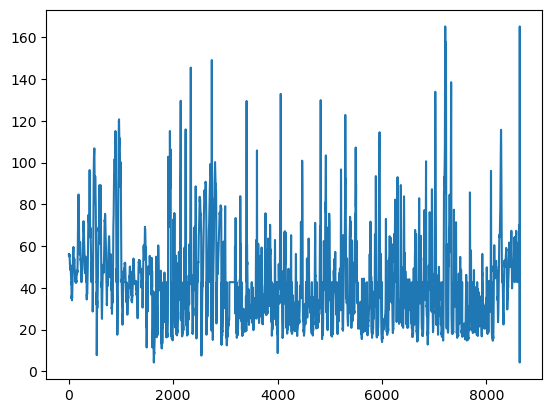

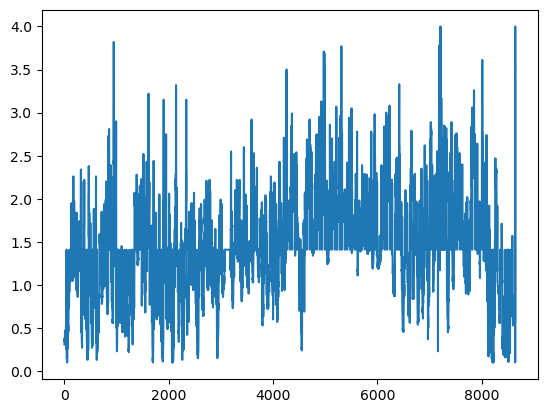

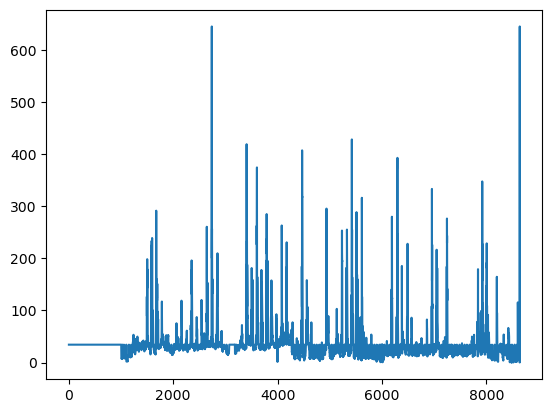

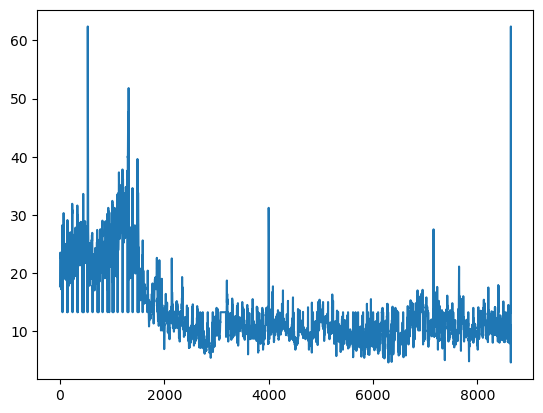

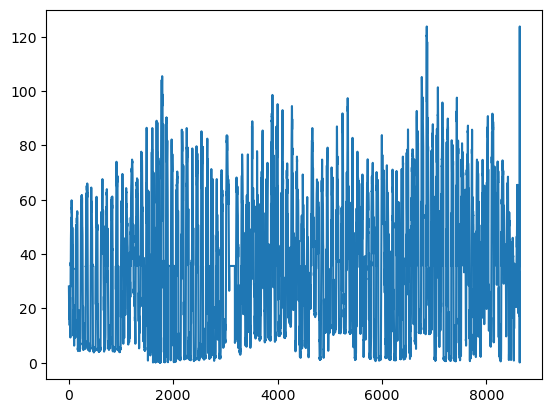

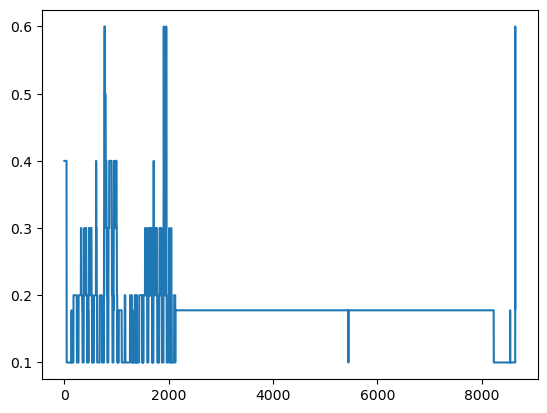

In [14]:
for column in columns:
    dataSet[column].plot()
    plt.show()


C:\Users\rs725\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


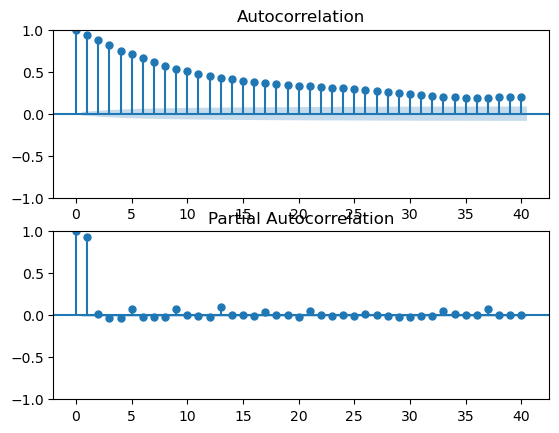

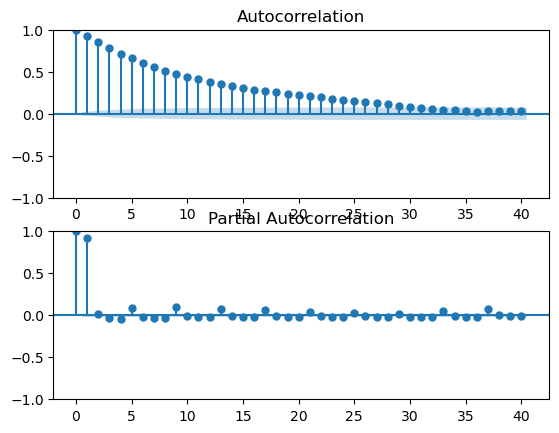

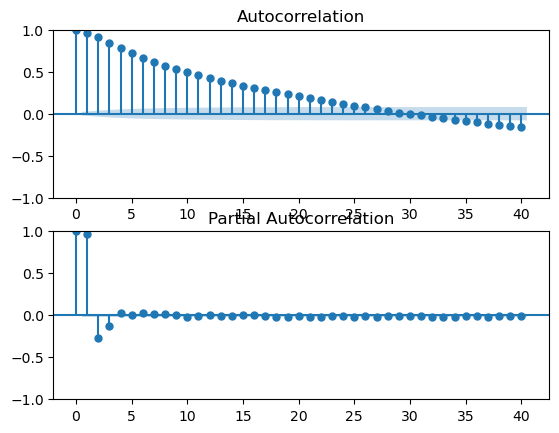

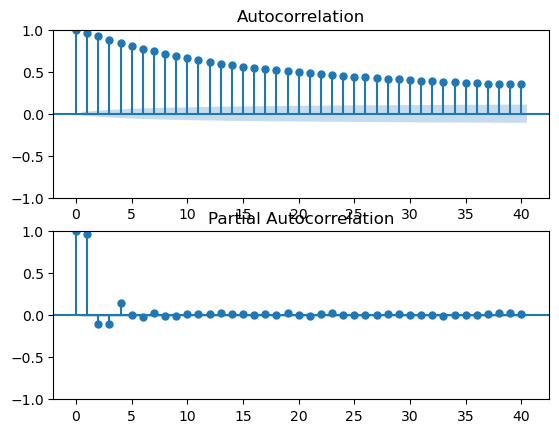

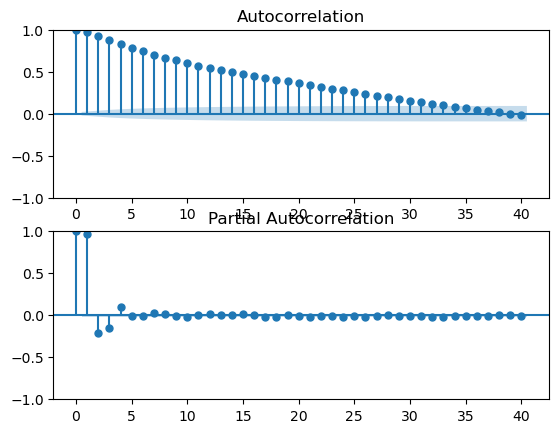

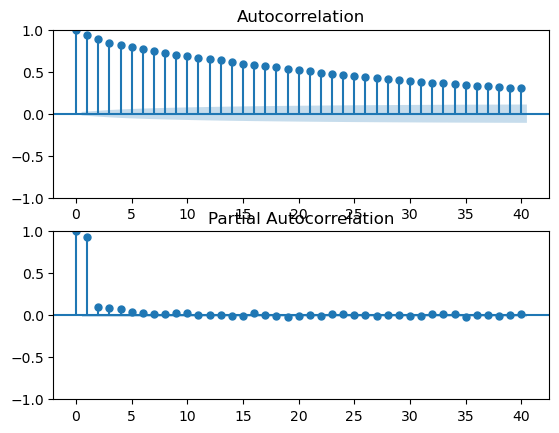

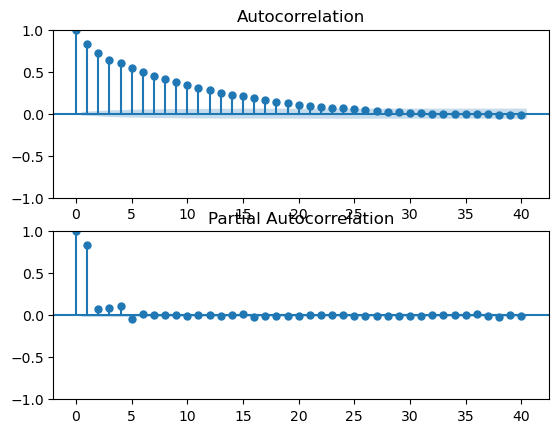

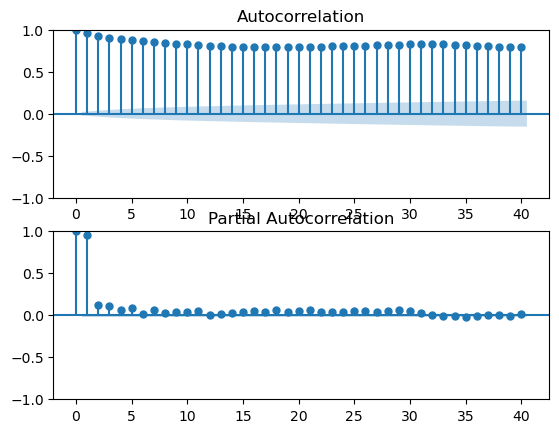

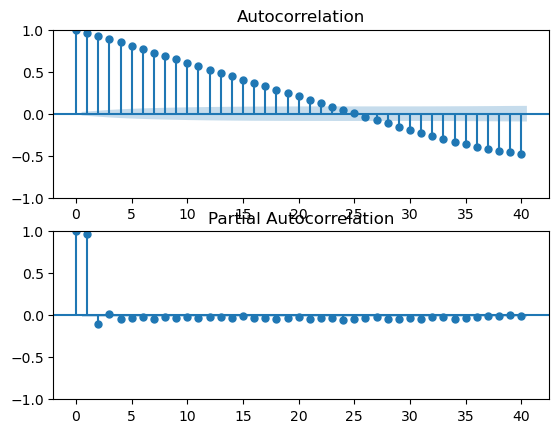

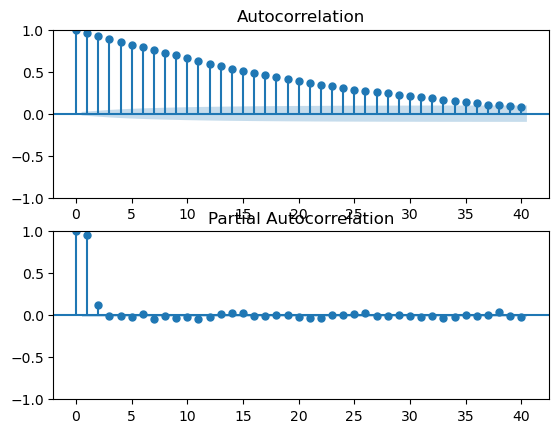

In [15]:
for column in columns:
    fig, (ax1, ax2) = plt.subplots(2)
    plot_acf(dataSet[column], ax = ax1)
    plot_pacf(dataSet[column], ax = ax2)
    plt.show()

In [16]:
from statsmodels.tsa.ar_model import AutoReg

                                              AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8643
Model:                                                        AutoReg(3)   Log Likelihood              -44925.397
Method:                                                  Conditional MLE   S.D. of innovations             43.849
Date:                                                   Fri, 23 Jun 2023   AIC                          89860.795
Time:                                                           17:08:38   BIC                          89896.116
Sample:                                                                3   HQIC                         89872.838
                                                                    8643                                         
                                                               coef    std err          

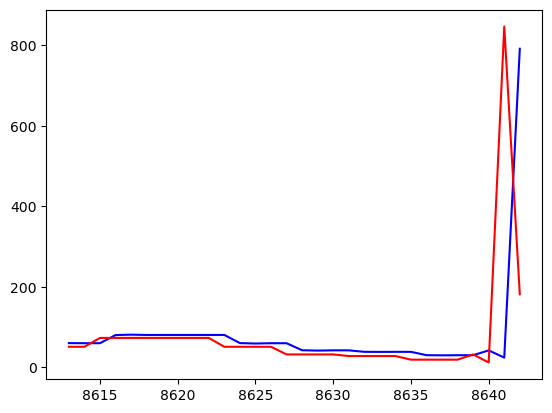

Mean : 181.479950
Root Mean Squared Error : 13.692178
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8643
Model:                                                         AutoReg(3)   Log Likelihood              -38629.265
Method:                                                   Conditional MLE   S.D. of innovations             21.158
Date:                                                    Fri, 23 Jun 2023   AIC                          77268.530
Time:                                                            17:08:38   BIC                          77303.851
Sample:                                                                 3   HQIC                         77280.573
                                                                     8643                                         
                          

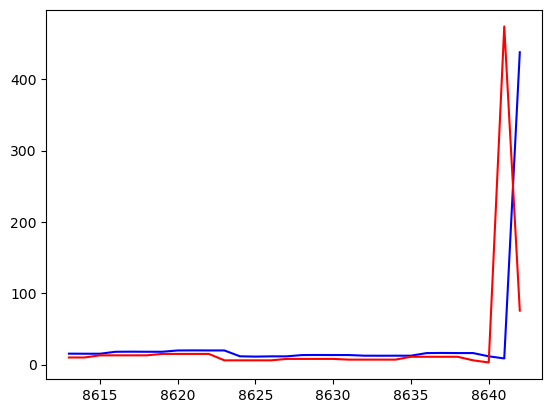

Mean : 75.729083
Root Mean Squared Error : 10.383320
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)   No. Observations:                 8643
Model:                                                      AutoReg(3)   Log Likelihood              -25269.840
Method:                                                Conditional MLE   S.D. of innovations              4.508
Date:                                                 Fri, 23 Jun 2023   AIC                          50549.680
Time:                                                         17:08:39   BIC                          50585.001
Sample:                                                              3   HQIC                         50561.724
                                                                  8643                                         
                                                   

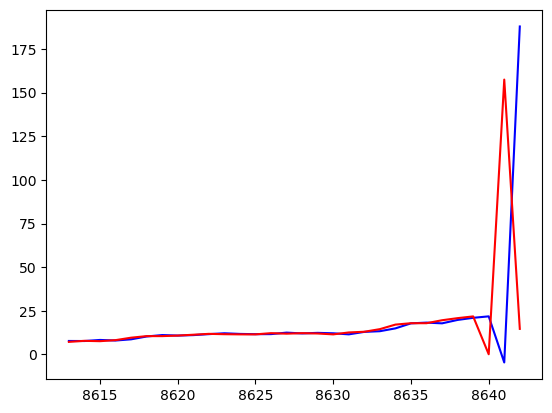

Mean : 14.667274
Root Mean Squared Error : 6.596185
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)   No. Observations:                 8643
Model:                                                       AutoReg(3)   Log Likelihood              -26436.601
Method:                                                 Conditional MLE   S.D. of innovations              5.160
Date:                                                  Fri, 23 Jun 2023   AIC                          52883.203
Time:                                                          17:08:39   BIC                          52918.524
Sample:                                                               3   HQIC                         52895.246
                                                                   8643                                         
                                            

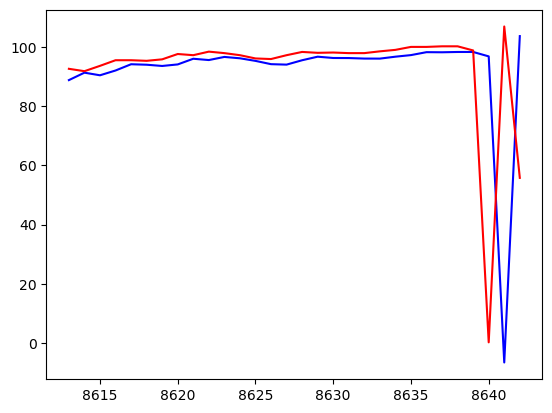

Mean : 55.756492
Root Mean Squared Error : 5.353434
                                            AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)   No. Observations:                 8643
Model:                                                     AutoReg(3)   Log Likelihood              -26397.339
Method:                                               Conditional MLE   S.D. of innovations              5.136
Date:                                                Fri, 23 Jun 2023   AIC                          52804.678
Time:                                                        17:08:39   BIC                          52839.999
Sample:                                                             3   HQIC                         52816.721
                                                                 8643                                         
                                                            

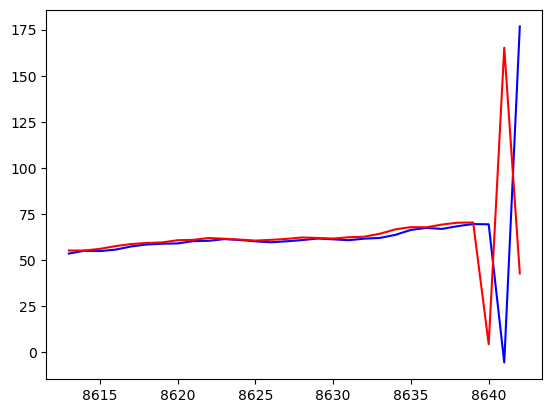

Mean : 42.682434
Root Mean Squared Error : 6.435545
                                             AutoReg Model Results                                             
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)   No. Observations:                 8643
Model:                                                      AutoReg(3)   Log Likelihood                 884.895
Method:                                                Conditional MLE   S.D. of innovations              0.218
Date:                                                 Fri, 23 Jun 2023   AIC                          -1759.790
Time:                                                         17:08:39   BIC                          -1724.470
Sample:                                                              3   HQIC                         -1747.747
                                                                  8643                                         
                                                    

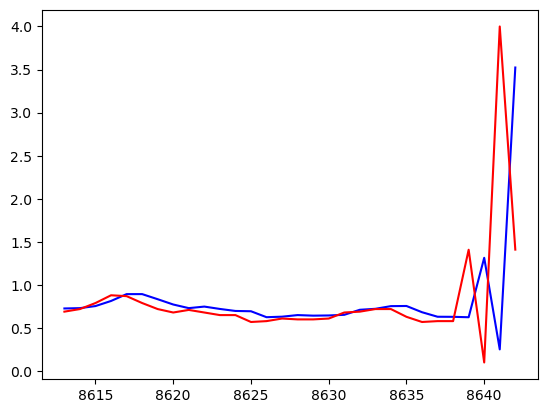

Mean : 1.408695
Root Mean Squared Error : 0.911609
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)   No. Observations:                 8643
Model:                                                       AutoReg(3)   Log Likelihood              -38160.561
Method:                                                 Conditional MLE   S.D. of innovations             20.041
Date:                                                  Fri, 23 Jun 2023   AIC                          76331.123
Time:                                                          17:08:39   BIC                          76366.443
Sample:                                                               3   HQIC                         76343.166
                                                                   8643                                         
                                             

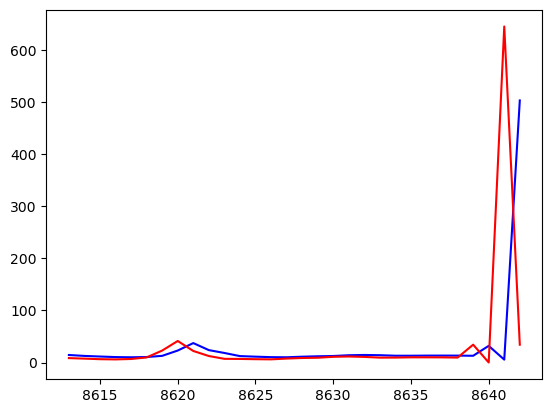

Mean : 34.312991
Root Mean Squared Error : 12.050212
                                             AutoReg Model Results                                              
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)   No. Observations:                 8643
Model:                                                       AutoReg(3)   Log Likelihood              -16944.740
Method:                                                 Conditional MLE   S.D. of innovations              1.720
Date:                                                  Fri, 23 Jun 2023   AIC                          33899.479
Time:                                                          17:08:39   BIC                          33934.800
Sample:                                                               3   HQIC                         33911.523
                                                                   8643                                         
                                           

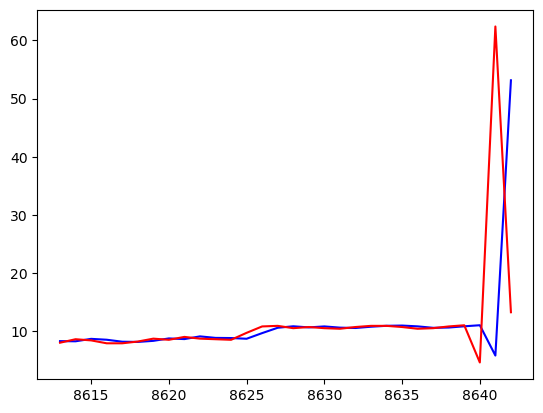

Mean : 13.247534
Root Mean Squared Error : 3.564329
                                              AutoReg Model Results                                               
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)   No. Observations:                 8643
Model:                                                         AutoReg(3)   Log Likelihood              -28875.484
Method:                                                   Conditional MLE   S.D. of innovations              6.842
Date:                                                    Fri, 23 Jun 2023   AIC                          57760.968
Time:                                                            17:08:40   BIC                          57796.289
Sample:                                                                 3   HQIC                         57773.012
                                                                     8643                                         
                            

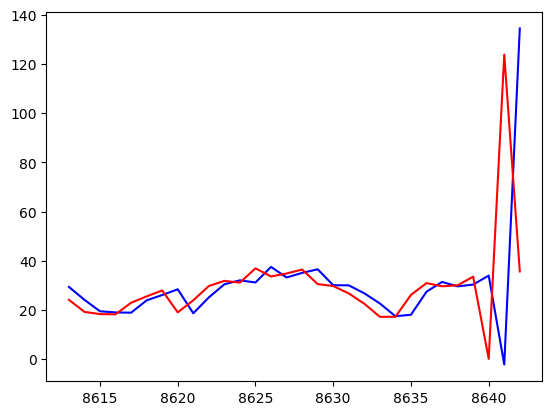

Mean : 35.632958
Root Mean Squared Error : 5.488902
                                               AutoReg Model Results                                                
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)   No. Observations:                 8643
Model:                                                           AutoReg(3)   Log Likelihood               23833.412
Method:                                                     Conditional MLE   S.D. of innovations              0.015
Date:                                                      Fri, 23 Jun 2023   AIC                         -47656.824
Time:                                                              17:08:40   BIC                         -47621.503
Sample:                                                                   3   HQIC                        -47644.780
                                                                       8643                                         
            

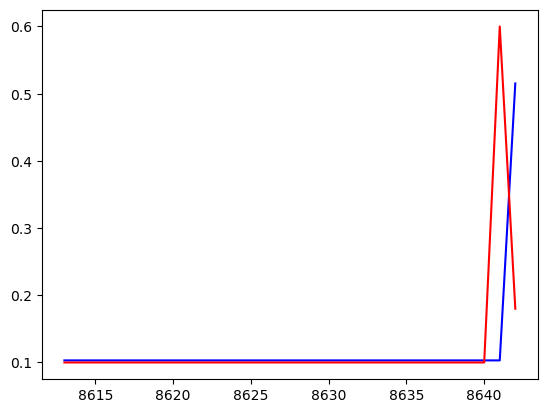

Mean : 0.177647
Root Mean Squared Error : 0.330870


In [18]:
for column in columns:
    data = dataSet[column]
    train_data = data[:-30]
    test_data = data[-30:]
    ar_model = AutoReg(data, lags = 3).fit()
    print(ar_model.summary())
    pred = ar_model.predict(start = len(train_data), end = len(data) - 1, dynamic=False)
    plt.plot(pred, color = "blue")
    plt.plot(test_data, color = "red")
    plt.show()
    rmse = (sqrt(mean_squared_error(pred, test_data)))
    mean = data.mean()
    print("Mean : %f" % mean)
    print("Root Mean Squared Error : %f" %rmse)
